In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from collections import OrderedDict
from ripser import Rips
import persim
from sklearn.cluster import AgglomerativeClustering
import warnings
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#read gdp per person and rename the columns
gdp = pd.read_csv('gdp.csv')
gdp = gdp.rename(columns={"GDP per person employed (constant 2017 PPP $)": "GDP"})

In [4]:
#read population csv, drop some columns, melt columns into rows, change type of column year and rename column
population = pd.read_csv('population.csv', skiprows=3)
population = population.drop(columns=["Unnamed: 66", "Indicator Code", "Country Name", "Indicator Name"])
population_tall = pd.melt(population, id_vars="Country Code", var_name="Year", value_name="Population")
population_tall["Year"] = population_tall["Year"].astype(np.int64)
population_tall = population_tall.rename(columns={"Country Code": "Code"})
population_tall

,Code,Year,Population
0,ABW,1960,54608.0
1,AFE,1960,130692579.0
2,AFG,1960,8622466.0
3,AFW,1960,97256290.0
4,AGO,1960,5357195.0
...,...,...,...
16487,XKX,2021,1786038.0
16488,YEM,2021,32981641.0
16489,ZAF,2021,59392255.0
16490,ZMB,2021,19473125.0


In [5]:
#merge gdp and population and drop null rows
data = gdp.merge(population_tall, on=["Code", "Year"])
data = data.dropna()

In [6]:
#read workforce csv, drop some columns, melt columns into rows, change type of column year and rename column
workforce = pd.read_csv('WorkForce.csv', skiprows=3)
workforce = workforce.drop(columns=["Unnamed: 66", "Indicator Code", "Country Name", "Indicator Name"])
workforce_tall = pd.melt(workforce, id_vars="Country Code", var_name="Year", value_name="WorkForce")
workforce_tall["Year"] = workforce_tall["Year"].astype(np.int64)
workforce_tall = workforce_tall.rename(columns={"Country Code": "Code"})
workforce_tall

,Code,Year,WorkForce
0,ABW,1960,NaN
1,AFE,1960,NaN
2,AFG,1960,NaN
3,AFW,1960,NaN
4,AGO,1960,NaN
...,...,...,...
16487,XKX,2021,NaN
16488,YEM,2021,7298663.0
16489,ZAF,2021,22397601.0
16490,ZMB,2021,8113422.0


In [7]:
#merge gdp,population and workforce and drop null rows
data1 = data.merge(workforce_tall, on=["Code", "Year"])
data1 = data1.dropna()

In [8]:
#read refugees csv, drop some columns, melt columns into rows, change type of column year and rename column
refugees = pd.read_csv('refugees.csv', skiprows=3)
refugees = refugees.drop(columns=["Unnamed: 66", "Indicator Code", "Country Name", "Indicator Name"])
refugees_tall = pd.melt(refugees, id_vars="Country Code", var_name="Year", value_name="Refugees")
refugees_tall["Year"] = refugees_tall["Year"].astype(np.int64)
refugees_tall = refugees_tall.rename(columns={"Country Code": "Code"})
refugees_tall


,Code,Year,Refugees
0,ABW,1960,NaN
1,AFE,1960,NaN
2,AFG,1960,NaN
3,AFW,1960,NaN
4,AGO,1960,NaN
...,...,...,...
16487,XKX,2021,NaN
16488,YEM,2021,89467.0
16489,ZAF,2021,75512.0
16490,ZMB,2021,75154.0


In [9]:
#merge gdp,population,workforce and refugees and drop null rows
data2 = data1.merge(refugees_tall, on=["Code", "Year"])
data2 = data2.dropna()

In [10]:
#read schoolenrollment csv, drop some columns, melt columns into rows, change type of column year and rename column
school_enrollment = pd.read_csv('schoolenrollment.csv', skiprows=3)
school_enrollment = school_enrollment.drop(columns=["Unnamed: 66", "Indicator Code", "Country Name", "Indicator Name"])
school_enrollment_tall = pd.melt(school_enrollment, id_vars="Country Code", var_name="Year", value_name="SchoolEnrollment")
school_enrollment_tall["Year"] = school_enrollment_tall["Year"].astype(np.int64)
school_enrollment_tall = school_enrollment_tall.rename(columns={"Country Code": "Code"})
school_enrollment_tall

,Code,Year,SchoolEnrollment
0,ABW,1960,NaN
1,AFE,1960,NaN
2,AFG,1960,NaN
3,AFW,1960,NaN
4,AGO,1960,NaN
...,...,...,...
16487,XKX,2021,NaN
16488,YEM,2021,NaN
16489,ZAF,2021,NaN
16490,ZMB,2021,NaN


In [11]:
#merge gdp,population,workforce, refugees and school enrollment and drop null rows
#final data at the moment
data3 = data2.merge(school_enrollment_tall, on=["Code", "Year"])
data3 = data3.dropna()
data3

,Entity,Code,Year,GDP,Population,WorkForce,Refugees,SchoolEnrollment
0,Afghanistan,AFG,2003,5742.153809,22645130.0,5320158.0,24.0,93.362183
1,Afghanistan,AFG,2004,5529.232422,23553551.0,5548197.0,31.0,104.663818
2,Afghanistan,AFG,2005,5900.214355,24411191.0,5794645.0,31.0,98.099892
3,Afghanistan,AFG,2006,6055.205078,25442944.0,6070572.0,34.0,101.697853
4,Afghanistan,AFG,2007,6771.464355,25903301.0,6109636.0,43.0,98.933510
...,...,...,...,...,...,...,...,...
4213,Zimbabwe,ZWE,2016,7968.250488,14452704.0,7024925.0,7423.0,101.309677
4214,Zimbabwe,ZWE,2017,8213.922852,14751101.0,7214627.0,7566.0,98.933189
4215,Zimbabwe,ZWE,2018,8464.795898,15052184.0,7403981.0,7795.0,97.750809
4216,Zimbabwe,ZWE,2019,7806.484375,15354608.0,7591946.0,8956.0,97.140213


In [12]:
scaler= StandardScaler()
# standardization of data
data3_standardized = data3.copy()
data3_standardized[['GDP', 'Population','WorkForce','Refugees','SchoolEnrollment']] = scaler.fit_transform(data3_standardized[['GDP', 'Population','WorkForce','Refugees','SchoolEnrollment']]) 
data3_standardized = data3_standardized.sort_values(by=['Code'])
data3_standardized


,Entity,Code,Year,GDP,Population,WorkForce,Refugees,SchoolEnrollment
0,Afghanistan,AFG,2003,-0.919385,-0.141360,-0.197016,-0.318141,-0.440504
16,Afghanistan,AFG,2019,-0.849106,-0.040170,-0.132650,-0.115658,0.381103
15,Afghanistan,AFG,2018,-0.849928,-0.047414,-0.137783,-0.115656,0.214494
14,Afghanistan,AFG,2017,-0.844672,-0.054395,-0.142691,-0.105282,0.102368
13,Afghanistan,AFG,2016,-0.842215,-0.061134,-0.147395,-0.150592,0.121505
...,...,...,...,...,...,...,...,...
4189,Zimbabwe,ZWE,1992,-0.841604,-0.221669,-0.205635,0.348422,0.229076
4188,Zimbabwe,ZWE,1991,-0.813053,-0.223434,-0.207648,0.236007,0.297900
4216,Zimbabwe,ZWE,2019,-0.867206,-0.190137,-0.165648,-0.293092,-0.207797
4198,Zimbabwe,ZWE,2001,-0.820152,-0.213176,-0.191263,-0.293788,0.599977


In [13]:
t = data3_standardized.groupby('Entity').count()["Code"]
countries_to_keep = t[t > 10].index
data3_filtered = data3_standardized.loc[data3_standardized["Entity"].isin(countries_to_keep)]
data3_filtered

,Entity,Code,Year,GDP,Population,WorkForce,Refugees,SchoolEnrollment
0,Afghanistan,AFG,2003,-0.919385,-0.141360,-0.197016,-0.318141,-0.440504
16,Afghanistan,AFG,2019,-0.849106,-0.040170,-0.132650,-0.115658,0.381103
15,Afghanistan,AFG,2018,-0.849928,-0.047414,-0.137783,-0.115656,0.214494
14,Afghanistan,AFG,2017,-0.844672,-0.054395,-0.142691,-0.105282,0.102368
13,Afghanistan,AFG,2016,-0.842215,-0.061134,-0.147395,-0.150592,0.121505
...,...,...,...,...,...,...,...,...
4189,Zimbabwe,ZWE,1992,-0.841604,-0.221669,-0.205635,0.348422,0.229076
4188,Zimbabwe,ZWE,1991,-0.813053,-0.223434,-0.207648,0.236007,0.297900
4216,Zimbabwe,ZWE,2019,-0.867206,-0.190137,-0.165648,-0.293092,-0.207797
4198,Zimbabwe,ZWE,2001,-0.820152,-0.213176,-0.191263,-0.293788,0.599977


In [14]:
#group datatable as ordered dictionary where dict key is column name entity
slovar = OrderedDict(sorted(data3_filtered.groupby("Entity")))
#get keys and order the so they ordered the sae as in slovar
kljucki = slovar.keys()
kljucki_list = list(kljucki)

In [15]:
#make lists for pointclouds and peristent diagrams of them
pointclouds = []
persistent_diagrams_all = []

In [16]:
#make pointclouds by making an array of points from numerical columns
for kljucek in kljucki_list:
    pointclouds.append(slovar[kljucek][['GDP', 'Population','WorkForce','Refugees','SchoolEnrollment']].values)    

In [17]:
#rv filtration + persistent diagrams up to dimension 1 (so H_1)
rips = Rips(maxdim=1)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [18]:
#calculate persistent diagrams up to dimension 1 but put into array just H_0
for pointcloud in pointclouds:
    persistent_diagrams_all.append(rips.fit_transform(pointcloud)[0])

In [19]:
#initialize distance matrix for bottleneck distance
matrika_razdalj = np.zeros((len(persistent_diagrams_all),len(persistent_diagrams_all)))

In [20]:
#boundary of distance matrix
meja = len(persistent_diagrams_all)

In [21]:
#compute bottleneck distance matrix for all persistent diagrams H_0 for all pointclouds
for i in range(0,meja):
    for j in range(i+1,meja):
        if not (len(persistent_diagrams_all[i]) == 1 & len(persistent_diagrams_all[j]) == 1):
            matrika_razdalj[i][j] = persim.bottleneck(persistent_diagrams_all[i], persistent_diagrams_all[j], matching=False)
            matrika_razdalj[j][i] = matrika_razdalj[i][j]
       
    

In [22]:
#make clustering for matrika_razdalj
clustering = AgglomerativeClustering(affinity="precomputed",linkage='complete',distance_threshold=0.1, n_clusters=None).fit(matrika_razdalj)
#check nr of clusters
clustering.n_clusters_

58

In [23]:
#check all the clusters 
clusterji = clustering.labels_
clusterji

array([13,  4,  4, 53,  4, 57,  7,  9, 47, 20,  9,  9, 56,  4, 54, 41, 26,
       52, 30, 14, 11,  9, 38, 11, 42, 49, 25, 55,  7,  8,  1,  0,  4, 48,
        9,  5, 12,  1, 32,  9, 26,  2, 54,  4, 43,  5,  5, 50,  1,  9,  6,
       29, 37,  4,  0, 19,  9, 40,  0, 31, 15, 54,  9, 25, 45, 24, 18, 27,
       25, 54, 13, 54, 12, 35, 28, 54, 52,  4, 11,  0,  6, 34, 52, 12, 54,
        6, 19, 54,  5,  8, 14,  9,  0,  3, 44,  8, 26, 33,  5,  5,  4, 36,
        9,  5, 14, 11, 21, 10, 26, 23, 46,  9,  5,  4,  9, 25,  9, 39, 10,
       20, 19,  2,  9, 23, 54, 51, 17,  3, 16,  5, 22,  9, 25,  4, 12,  7],
      dtype=int64)

In [24]:
#connect array of clusters clusterji with pointclouds by name of the country
dict1 = {}
for i in range(0,len(kljucki_list)):
    dict1[clusterji[i]] = []
for i in range(0,len(kljucki_list)):
    if kljucki_list[i] not in dict1[clusterji[i]]:
        dict1[clusterji[i]] = dict1[clusterji[i]]+[kljucki_list[i]]

In [25]:
#initialize distance matrix for wasserstein distance
matrika_razdalj1 = np.zeros((len(persistent_diagrams_all),len(persistent_diagrams_all)))

In [26]:
#compute wasserstein distance matrix for all persistent diagrams H_0 for all pointclouds
for i in range(0,meja):
    for j in range(i+1,meja):
        matrika_razdalj1[i][j] = persim.wasserstein(persistent_diagrams_all[i], persistent_diagrams_all[j], matching=False)
        matrika_razdalj1[j][i] = matrika_razdalj1[i][j]
       

In [27]:
#make clustering for matrika_razdalj1
clustering1 = AgglomerativeClustering(affinity="precomputed",linkage='complete',distance_threshold=0.7, n_clusters=None).fit(matrika_razdalj1)
#check nr of clusters
clustering1.n_clusters_

58

In [28]:
#check all the clusters
clusterji1 = clustering1.labels_
clusterji1

array([ 1,  7,  7, 51, 13, 29, 12, 13, 49, 41, 10, 10,  4, 10, 10, 47, 24,
       28, 53, 43, 56, 10,  9,  4, 21, 55, 10, 40,  3,  6, 24, 19,  7, 27,
       10, 41,  2,  5, 21, 10,  5, 52, 10,  7, 34, 43, 43, 20,  5, 13,  2,
       20, 36, 12, 45, 26, 10, 50, 23, 31, 33, 10,  7, 54, 37, 46, 57, 38,
       12, 10,  1, 13,  0, 48, 16, 13,  6,  7, 11, 19, 22,  1, 42,  0, 13,
        2,  3, 10,  3,  6, 28, 10, 19,  1, 30, 25,  5, 14, 41,  3,  3, 23,
       10, 41, 42, 11, 32, 18,  5, 43, 35,  7,  3,  7, 13, 10, 10, 17, 44,
        3, 12,  8,  7, 26, 10, 39, 15,  1,  9, 41, 22, 10, 13,  7,  0,  1],
      dtype=int64)

In [29]:
#connect array of clusters clusterji1 with pointclouds by name of the country
dict2 = {}
for i in range(0,len(kljucki_list)):
    dict2[clusterji1[i]] = []
    
for i in range(0,len(kljucki_list)):
    if kljucki_list[i] not in dict2[clusterji1[i]]:
        dict2[clusterji1[i]] = dict2[clusterji1[i]]+[kljucki_list[i]]

In [30]:
#helper function for plotting dendrograms from scipy library
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

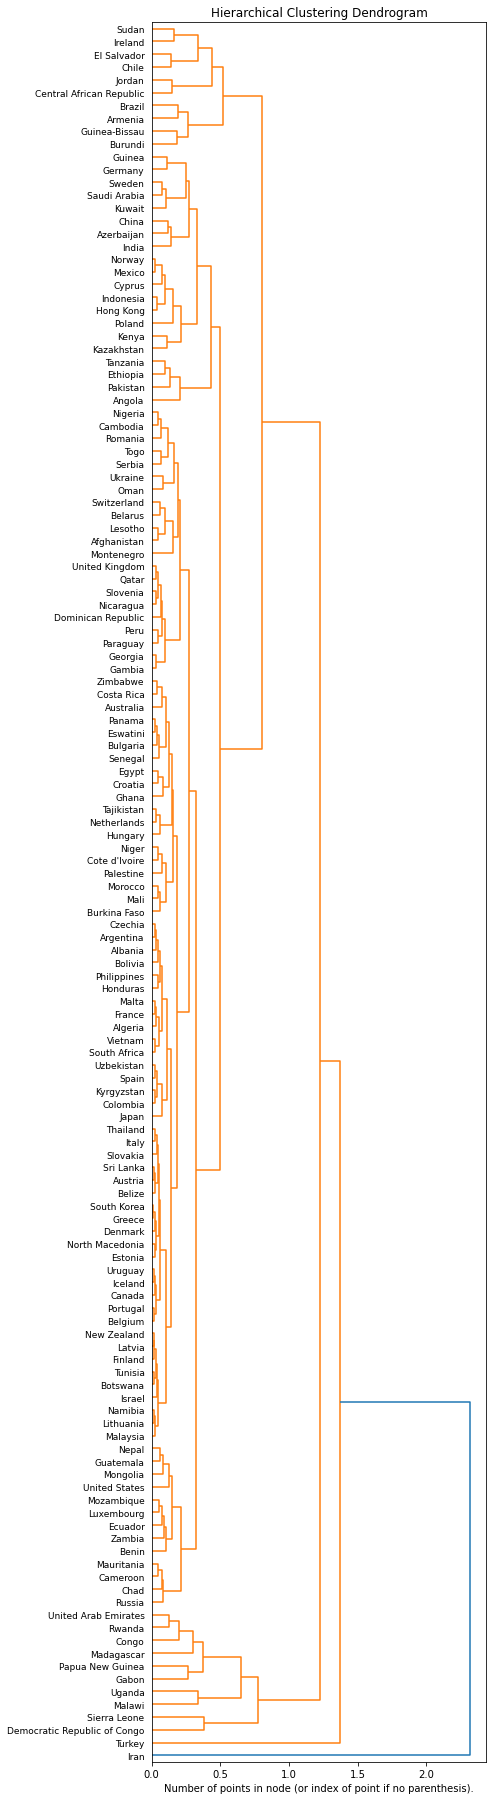

In [31]:
#plot dendrogram for clustering (bottleneck distance)
fig, ax = plt.subplots(figsize=(6, 32))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode="level", p=20, ax=ax, labels=kljucki_list, orientation="right", leaf_font_size=9)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.show()

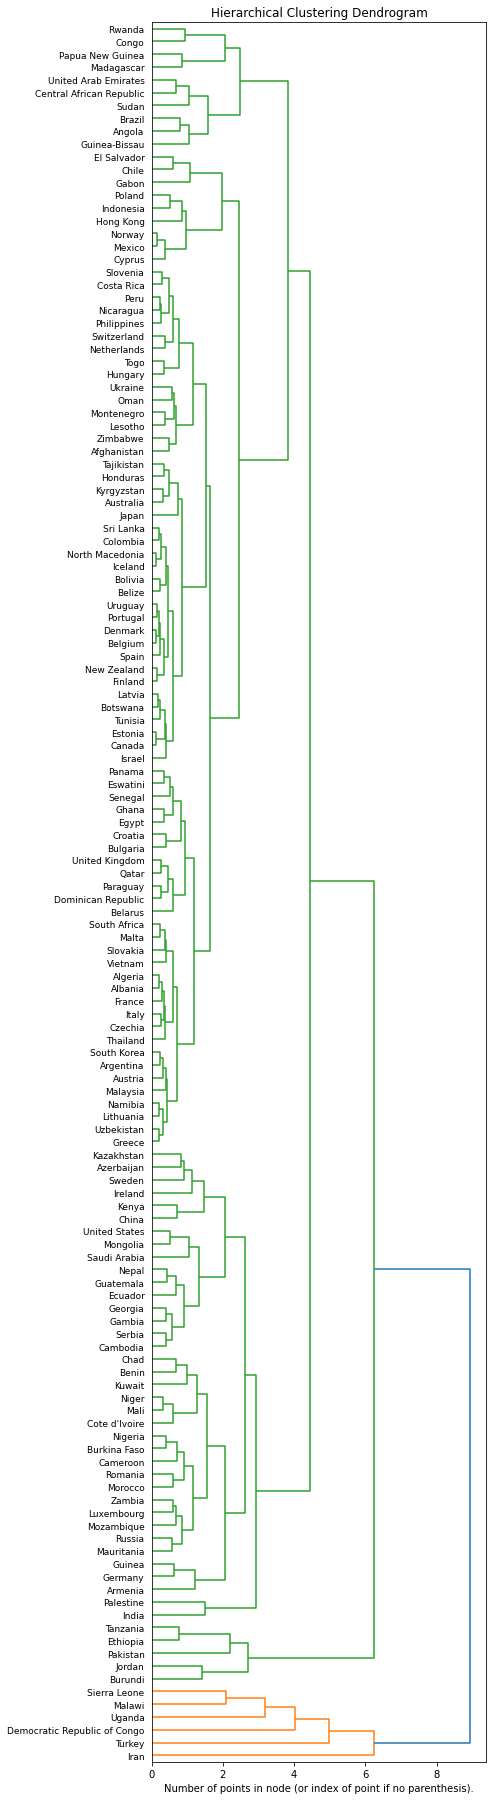

In [32]:
#plot dendrogram for clustering1 (wasserstein distance)
fig, ax = plt.subplots(figsize=(6, 32))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(clustering1, truncate_mode="level", p=20, ax=ax, labels=kljucki_list, orientation="right", leaf_font_size=9)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.show()

In [33]:
#end of project

In [34]:
#from that line onwards it was just testing the functions

Rips(maxdim=3, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


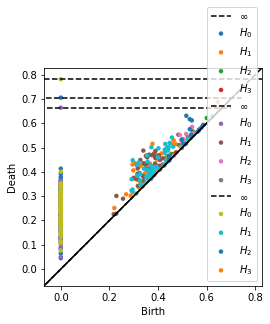

In [35]:
import numpy as np
from ripser import Rips
data=[]
diagrams =[]
rips = Rips(maxdim=3)
data.append(np.random.random((100,4)))
data.append(np.random.random((100,4)))
data.append(np.random.random((100,4)))
diagrams.append(rips.fit_transform(data[0]))
diagrams.append(rips.fit_transform(data[1]))
diagrams.append(rips.fit_transform(data[2]))
rips.plot(diagrams[0])
rips.plot(diagrams[1])
rips.plot(diagrams[2])

In [36]:
rips.fit_transform(data[2])

[array([[0.        , 0.07636038],
        [0.        , 0.10862034],
        [0.        , 0.10952397],
        [0.        , 0.11442294],
        [0.        , 0.13279033],
        [0.        , 0.14057098],
        [0.        , 0.14682131],
        [0.        , 0.15424481],
        [0.        , 0.15646173],
        [0.        , 0.15749203],
        [0.        , 0.15958145],
        [0.        , 0.16093282],
        [0.        , 0.16254395],
        [0.        , 0.17397669],
        [0.        , 0.1745791 ],
        [0.        , 0.17538403],
        [0.        , 0.17605935],
        [0.        , 0.1777121 ],
        [0.        , 0.17811114],
        [0.        , 0.17889801],
        [0.        , 0.17946689],
        [0.        , 0.17993072],
        [0.        , 0.18607102],
        [0.        , 0.18708128],
        [0.        , 0.19068792],
        [0.        , 0.19273162],
        [0.        , 0.19540635],
        [0.        , 0.1970484 ],
        [0.        , 0.19834945],
        [0.   

In [37]:
import persim

In [38]:
wasserstein_dists=persim.wasserstein(diagrams[0][2], diagrams[1][2], matching=False)
wasserstein_dists1=persim.wasserstein(diagrams[0][2], diagrams[2][2], matching=False)
wasserstein_dists2=persim.wasserstein(diagrams[2][2], diagrams[1][2], matching=False)

In [39]:
wasserstein_dists

0.25680272368405926

In [40]:
wasserstein_dists1

0.3480016377420908

In [41]:
wasserstein_dists2

0.28120045052127746

In [42]:
wasserstein_dists3=persim.bottleneck(diagrams[0][2], diagrams[1][2], matching=False)
wasserstein_dists4=persim.bottleneck(diagrams[0][2], diagrams[2][2], matching=False)
wasserstein_dists5=persim.bottleneck(diagrams[2][2], diagrams[1][2], matching=False)

In [43]:
wasserstein_dists3

0.030756309628486633

In [44]:
wasserstein_dists4

0.0571923553943634

In [45]:
wasserstein_dists5

0.04568523168563843

In [46]:
#testing end

In [47]:
#make pointclouds

In [48]:
np.random.random((100,2))

array([[0.87653586, 0.53226273],
       [0.6576142 , 0.1149524 ],
       [0.71992998, 0.71780577],
       [0.09254645, 0.61188382],
       [0.77484251, 0.33167965],
       [0.57801264, 0.22493117],
       [0.74653834, 0.6178846 ],
       [0.43102341, 0.25591445],
       [0.02412105, 0.03792089],
       [0.03222508, 0.33505252],
       [0.78164464, 0.40226115],
       [0.89233745, 0.77665031],
       [0.32587038, 0.54684076],
       [0.94519323, 0.698719  ],
       [0.66747411, 0.5299153 ],
       [0.81033158, 0.07165906],
       [0.86065779, 0.48554159],
       [0.36999474, 0.53435005],
       [0.9168964 , 0.85253289],
       [0.13963886, 0.89039914],
       [0.01813601, 0.3128679 ],
       [0.20018664, 0.85039429],
       [0.9758524 , 0.54116246],
       [0.3914498 , 0.4993462 ],
       [0.28756354, 0.51315971],
       [0.27591548, 0.69743144],
       [0.62391977, 0.85567145],
       [0.90493668, 0.09830944],
       [0.89245929, 0.52942926],
       [0.41766287, 0.73294378],
       [0.